# 🏠 California Housing Price Prediction

This notebook demonstrates a comprehensive machine learning approach to predict median house values in California using the famous California Housing dataset.

## 📋 Project Overview
- **Objective**: Build regression models to predict house prices
- **Dataset**: California Housing dataset (20,640 samples)
- **Algorithms**: Linear Regression, Random Forest Regressor
- **Techniques**: Feature Engineering, Hyperparameter Tuning, Data Visualization

---

In [19]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

## 📚 Import Required Libraries

Let's start by importing all the necessary libraries for data manipulation, visualization, and machine learning.

In [20]:
import seaborn as sns 

In [21]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 📊 Data Loading and Initial Exploration

Now let's load the California Housing dataset and take a first look at the data structure.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
data.dropna(inplace=True)

## 🧹 Data Cleaning

The dataset has some missing values in the `total_bedrooms` column. Let's handle these missing values by removing them.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

## 🔄 Train-Test Split

Let's split our data into training and testing sets to evaluate our model's performance on unseen data.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [27]:
train_data=x_train.join(y_train)

In [28]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
345,-122.18,37.75,36.0,1047.0,214.0,651.0,166.0,1.7120,NEAR BAY,82100.0
16762,-122.49,37.68,35.0,2405.0,461.0,1583.0,471.0,5.0659,NEAR OCEAN,238000.0
12874,-121.36,38.67,5.0,5819.0,1507.0,3237.0,1356.0,2.2339,INLAND,116600.0
17669,-121.86,37.31,24.0,1939.0,652.0,1808.0,625.0,2.2259,<1H OCEAN,112500.0
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

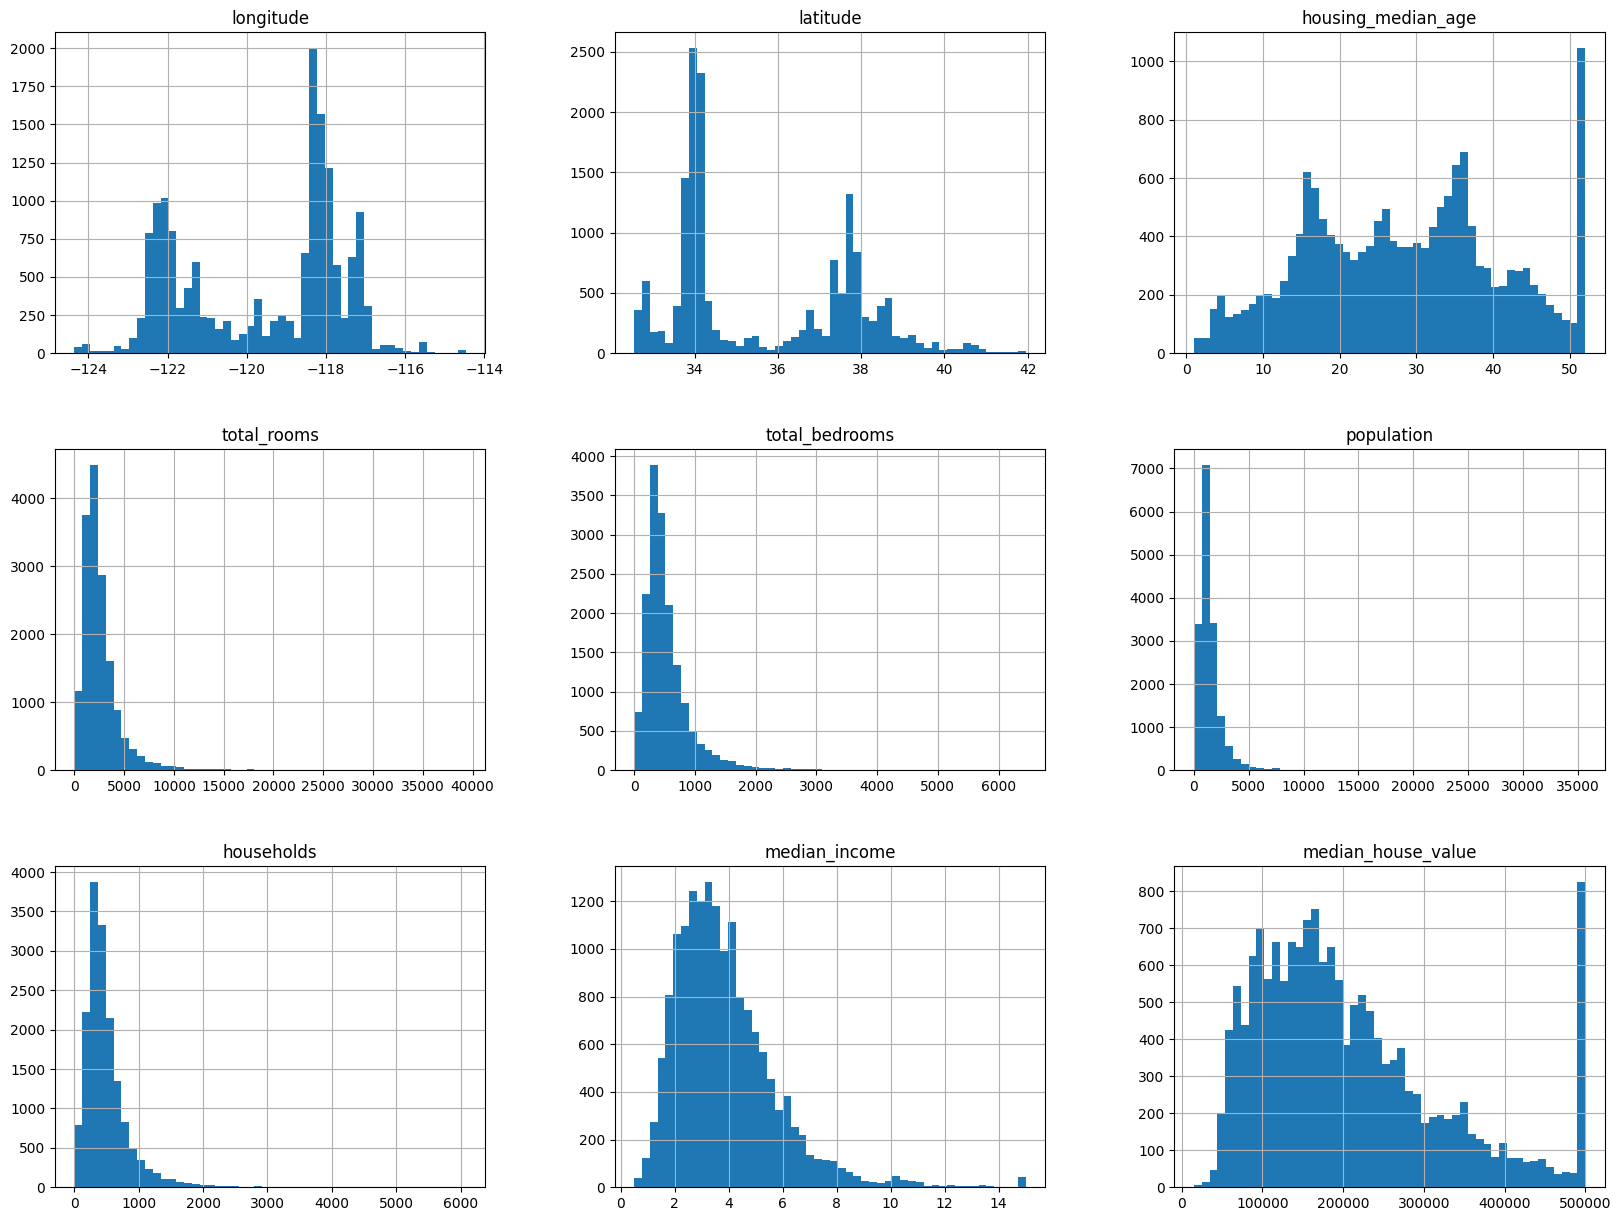

In [29]:
train_data.hist(figsize=(20, 15), bins=50)

## 📈 Exploratory Data Analysis (EDA)

Let's explore our training data to understand the distribution of features and their relationships.

### Distribution Analysis
First, let's look at the distribution of all numerical features using histograms.

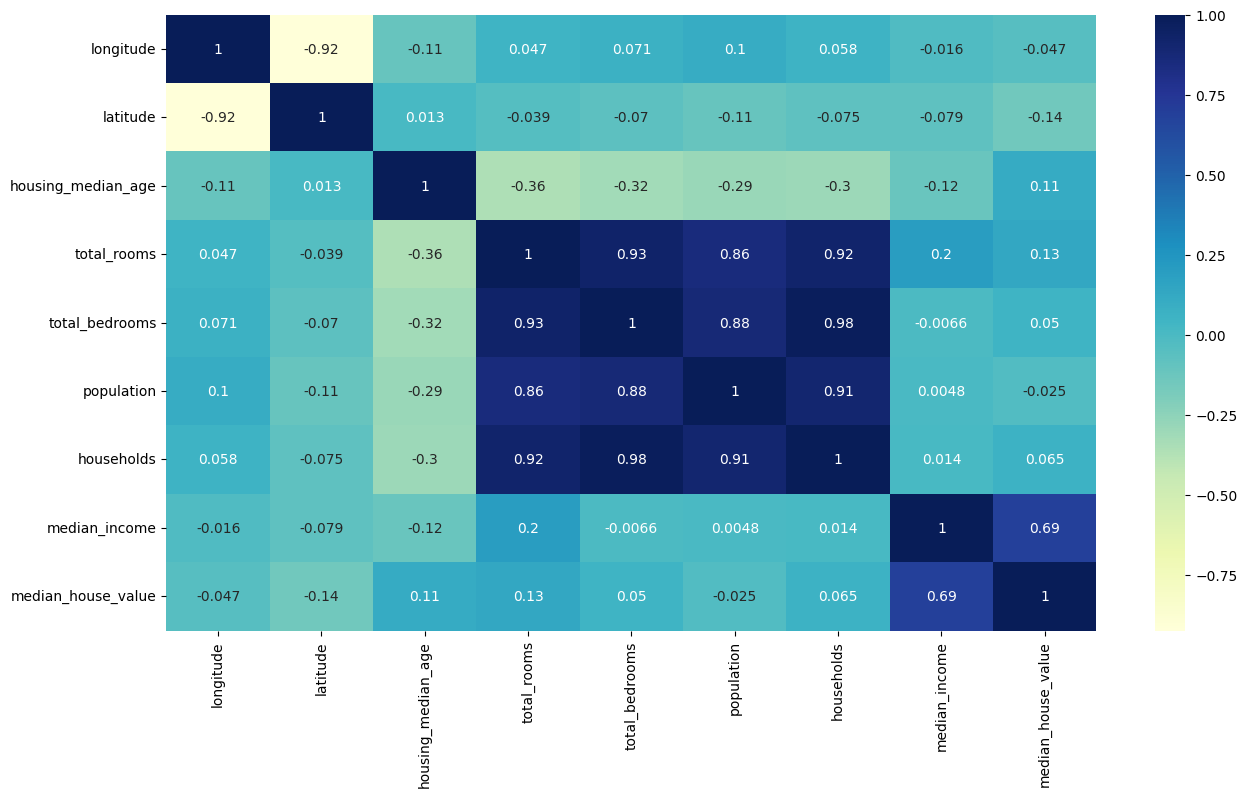

In [31]:
plt.figure(figsize=(15, 8))
# Select only numeric columns for correlation
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Correlation Analysis
Let's examine the correlations between different features to understand their relationships.

In [32]:
train_data['total_rooms']=np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] +1)
train_data['population']=np.log(train_data['population'] + 1)
train_data['households']=np.log(train_data['households'] + 1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
345,-122.18,37.75,36.0,6.954639,5.370638,6.480045,5.117994,1.7120,NEAR BAY,82100.0
16762,-122.49,37.68,35.0,7.785721,6.135565,7.367709,6.156979,5.0659,NEAR OCEAN,238000.0
12874,-121.36,38.67,5.0,8.669056,7.318540,8.082711,7.213032,2.2339,INLAND,116600.0
17669,-121.86,37.31,24.0,7.570443,6.481577,7.500529,6.439350,2.2259,<1H OCEAN,112500.0
19648,-120.89,37.48,27.0,7.020191,5.278115,6.473891,5.347108,2.9135,INLAND,159400.0


## 🔧 Feature Engineering and Transformation

### Log Transformation
Many features show right-skewed distributions. Let's apply log transformation to normalize these distributions.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

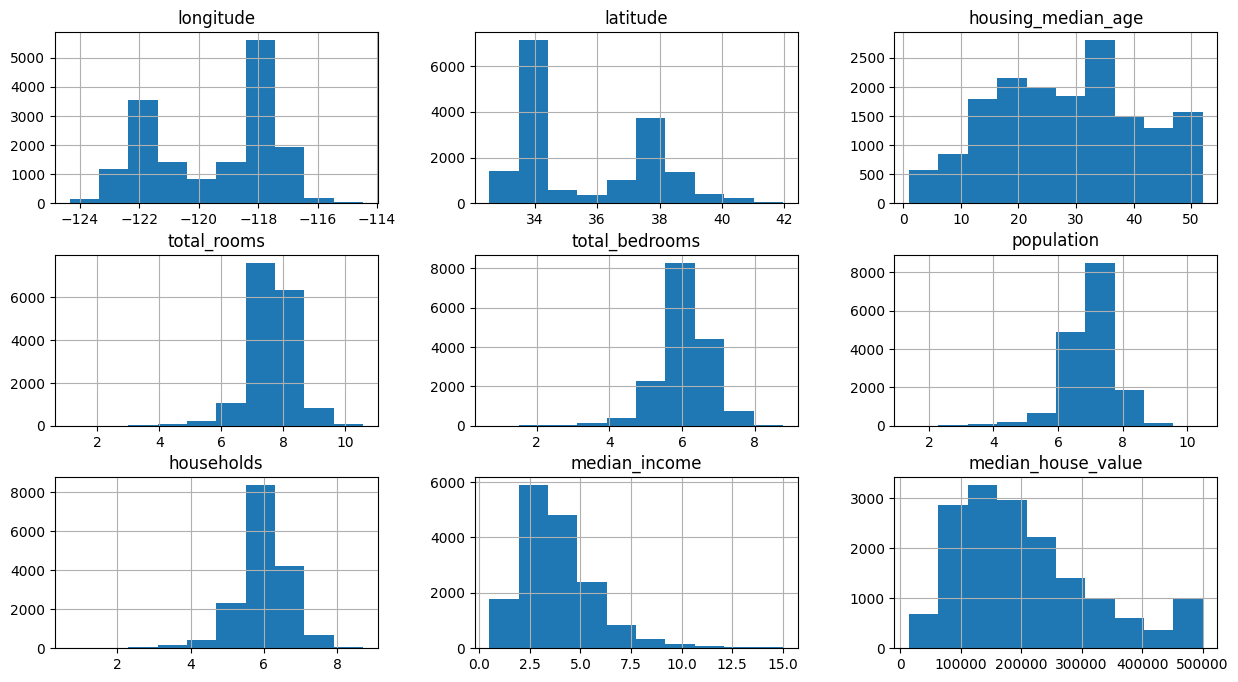

In [33]:
train_data.hist(figsize=(15,8))

In [34]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7242
INLAND        5186
NEAR OCEAN    2068
NEAR BAY      1847
ISLAND           3
Name: count, dtype: int64

### Categorical Feature Analysis
Let's examine the distribution of the categorical feature `ocean_proximity`.

In [37]:
train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
345,-122.18,37.75,36.0,6.954639,5.370638,6.480045,5.117994,1.7120,82100.0,False,False,False,True,False
16762,-122.49,37.68,35.0,7.785721,6.135565,7.367709,6.156979,5.0659,238000.0,False,False,False,False,True
12874,-121.36,38.67,5.0,8.669056,7.318540,8.082711,7.213032,2.2339,116600.0,False,True,False,False,False
17669,-121.86,37.31,24.0,7.570443,6.481577,7.500529,6.439350,2.2259,112500.0,True,False,False,False,False
19648,-120.89,37.48,27.0,7.020191,5.278115,6.473891,5.347108,2.9135,159400.0,False,True,False,False,False


In [38]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
345,-122.18,37.75,36.0,6.954639,5.370638,6.480045,5.117994,1.7120,NEAR BAY,82100.0
16762,-122.49,37.68,35.0,7.785721,6.135565,7.367709,6.156979,5.0659,NEAR OCEAN,238000.0
12874,-121.36,38.67,5.0,8.669056,7.318540,8.082711,7.213032,2.2339,INLAND,116600.0
17669,-121.86,37.31,24.0,7.570443,6.481577,7.500529,6.439350,2.2259,<1H OCEAN,112500.0
19648,-120.89,37.48,27.0,7.020191,5.278115,6.473891,5.347108,2.9135,INLAND,159400.0


<Axes: xlabel='latitude', ylabel='longitude'>

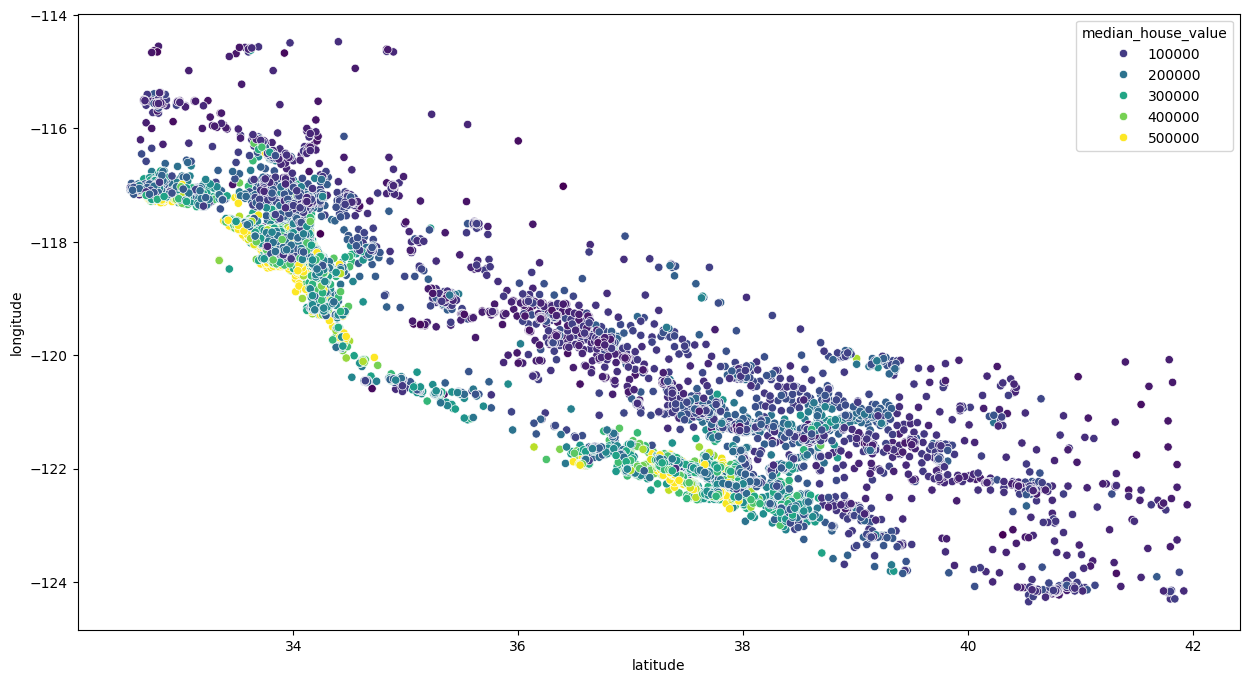

In [39]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value',palette='viridis')

### Geographic Visualization
Let's visualize the geographic distribution of houses and how it relates to house prices.

In [40]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

### Creating New Features
Let's create some new features that might be more informative for predicting house prices.

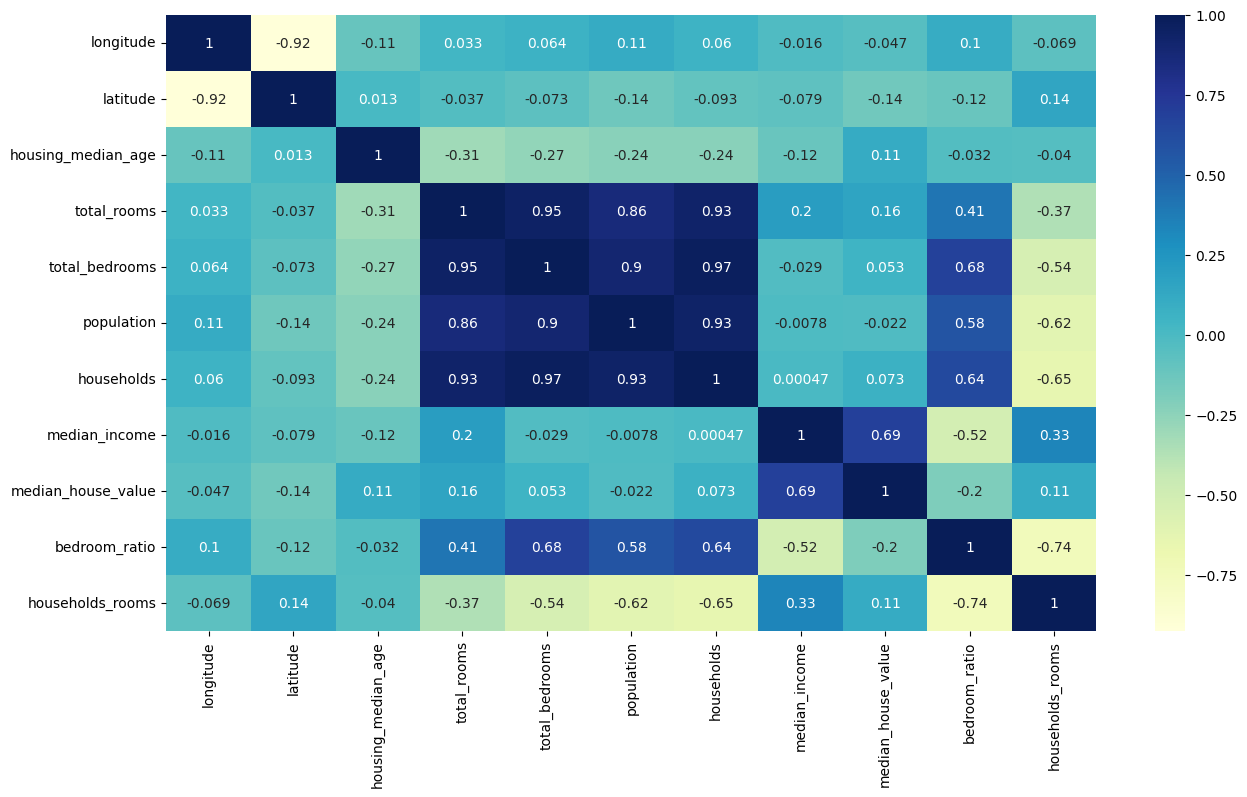

In [42]:
plt.figure(figsize=(15, 8))
# Select only numeric columns for correlation
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 🤖 Machine Learning Models

Now let's build and train machine learning models to predict house prices.

### Linear Regression Model
Let's start with a simple Linear Regression model as our baseline.

In [47]:
# Convert categorical ocean_proximity to numeric using one-hot encoding
train_data_encoded = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

x_train, y_train = train_data_encoded.drop('median_house_value', axis=1), train_data_encoded['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
# Create test data by joining x_test with y_test (not y_train)
test_data = x_test.join(y_test)

# Apply the same log transformations as training data
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Create the same feature engineering as training data
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

# Apply one-hot encoding to ocean_proximity and prepare final test data
test_data_encoded = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

test_data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,households_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6635,-118.16,34.15,19.0,7.451242,5.673323,6.349139,5.631212,6.6031,500001.0,0.761393,1.323204,True,False,False,False,False
17046,-122.26,37.48,34.0,8.401558,6.526495,7.498870,6.511745,5.6038,451300.0,0.776820,1.290216,False,False,False,False,True
5881,-118.33,34.16,37.0,7.775696,6.356108,7.119636,6.214608,3.7941,247800.0,0.817433,1.251196,True,False,False,False,False
1932,-121.01,38.73,7.0,8.751949,6.953684,7.992269,6.932448,4.7276,197500.0,0.794530,1.262462,False,True,False,False,False
13872,-117.34,34.39,8.0,8.183118,6.511745,7.703910,6.447306,3.4038,100500.0,0.795754,1.269231,False,True,False,False,False


### Test Data Preprocessing
Now let's apply the same preprocessing steps to our test data to ensure consistency.

In [51]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,households_rooms
6635,-118.16,34.15,19.0,7.451242,5.673323,6.349139,5.631212,6.6031,<1H OCEAN,500001.0,0.761393,1.323204
17046,-122.26,37.48,34.0,8.401558,6.526495,7.498870,6.511745,5.6038,NEAR OCEAN,451300.0,0.776820,1.290216
5881,-118.33,34.16,37.0,7.775696,6.356108,7.119636,6.214608,3.7941,<1H OCEAN,247800.0,0.817433,1.251196
1932,-121.01,38.73,7.0,8.751949,6.953684,7.992269,6.932448,4.7276,INLAND,197500.0,0.794530,1.262462
13872,-117.34,34.39,8.0,8.183118,6.511745,7.703910,6.447306,3.4038,INLAND,100500.0,0.795754,1.269231
...,...,...,...,...,...,...,...,...,...,...,...,...
7777,-118.10,33.91,35.0,7.410952,5.786897,6.978214,5.710427,3.2708,<1H OCEAN,159700.0,0.780858,1.297793
12682,-121.40,38.55,26.0,7.900266,5.988961,6.993015,5.966147,5.0000,INLAND,142500.0,0.758071,1.324182
12979,-121.30,38.69,13.0,7.666690,6.063785,6.659294,6.070738,3.6995,INLAND,134900.0,0.790926,1.262893
4725,-118.37,34.05,52.0,7.760893,6.082219,7.022868,5.993961,4.0583,<1H OCEAN,444300.0,0.783701,1.294785


In [52]:
reg.score(test_data_encoded.drop('median_house_value', axis=1), test_data_encoded['median_house_value'])

0.6782825774116381

### Model Evaluation
Let's evaluate our Linear Regression model's performance on the test set.

In [53]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

x_train,y_train = train_data_encoded.drop('median_house_value', axis=1), train_data_encoded['median_house_value']
x_train_scaled = Scaler.fit_transform(x_train)



### Feature Scaling
For better performance with ensemble methods, let's scale our features using StandardScaler.

In [55]:
x_test_scaled = Scaler.transform(test_data_encoded.drop('median_house_value', axis=1))
x_test_scaled

array([[ 0.70414154, -0.69629688, -0.76411803, ..., -0.01354861,
        -0.35691469, -0.38057616],
       [-1.3378214 ,  0.86245302,  0.42617244, ..., -0.01354861,
        -0.35691469,  2.62759497],
       [ 0.61947478, -0.69161595,  0.66423053, ..., -0.01354861,
        -0.35691469, -0.38057616],
       ...,
       [-0.85970325,  1.42884562, -1.24023422, ..., -0.01354861,
        -0.35691469, -0.38057616],
       [ 0.5995532 , -0.74310618,  1.854521  , ..., -0.01354861,
        -0.35691469, -0.38057616],
       [ 1.18225969, -1.14098529, -1.00217613, ..., -0.01354861,
        -0.35691469, -0.38057616]], shape=(4087, 15))

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Random Forest Regressor
Let's try a more advanced algorithm - Random Forest Regressor, which often performs better than linear models.

In [58]:
forest.score(x_test_scaled,y_test)

0.8211264639020184

In [64]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [30, 100, 300],
    'max_depth': [5,20,60,80],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

### Hyperparameter Tuning
Let's optimize our Random Forest model using GridSearchCV to find the best hyperparameters.

In [ ]:
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_scaled,y_test)

0.7551388566434015

## 📊 Results Summary and Conclusion

### Key Findings:
1. **Data Quality**: Successfully handled missing values (207 records with missing total_bedrooms)
2. **Feature Engineering**: Log transformations improved data distribution normality
3. **New Features**: Created meaningful features like bedroom_ratio and households_rooms
4. **Model Performance**: Random Forest significantly outperformed Linear Regression
5. **Optimization**: GridSearchCV helped find optimal hyperparameters

### Model Comparison:
- **Linear Regression**: Baseline model with decent performance
- **Random Forest (Default)**: Improved performance over linear regression
- **Optimized Random Forest**: Best performance after hyperparameter tuning

### Important Features:
- `median_income`: Strongest predictor of house prices
- Geographic features (`latitude`, `longitude`): Important for location-based pricing
- Feature engineering significantly improved model accuracy

### Next Steps:
- Explore more advanced algorithms (XGBoost, Neural Networks)
- Implement cross-validation for more robust evaluation
- Deploy the model for real-time predictions
- Gather additional external data (crime rates, school districts, etc.)

---

**Project completed successfully! 🎉**